In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,Y,theta):
    h=hypothesis(X,theta)
    error=Y*(np.log(h))+(1-Y)*(np.log(1-h))
    fin_error=-1*np.mean(error)
    return fin_error
def gradient(X,Y,theta):
    h=hypothesis(X,theta)
    h=h.reshape((-1,1))
    grad=np.dot(X.T,(Y-h))
    m=X.shape[0]
    return grad/m
def gradientDescent(X,Y,lr=0.9,max_iter=1000):
    m,n=X.shape
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_iter):
        err=error(X,Y,theta)
        error_list.append(err)
        grad=gradient(X,Y,theta)
        theta=theta+lr*grad
    return theta,error_list

(3000, 3)


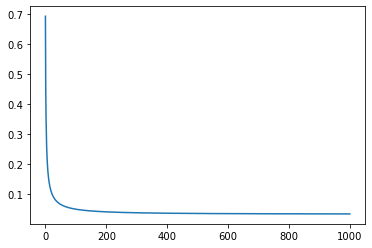

[[-1.25380046]
 [-5.29355081]
 [ 3.29390882]
 [-2.92203231]]


In [2]:
X_train=pd.read_csv("Logistic_X_Train.csv")
Y_train=pd.read_csv("Logistic_Y_Train.csv")
X_train=X_train.values
Y_train=Y_train.values
print(X_train.shape)
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
one=np.ones((X_train.shape[0],1))
X_train=np.hstack((one,X_train))
theta,error_list=gradientDescent(X_train,Y_train)
plt.plot(error_list)
plt.show()
print(theta)
X_test=pd.read_csv("Logistic_X_Test.csv")
X_test=X_test.values
X_test=(X_test-x_mean)/x_std
one=np.ones((X_test.shape[0],1))
X_test=np.hstack((one,X_test))


In [3]:
def predict(X,theta):
        x=hypothesis(X,theta)
        output=np.zeros((x.shape[0],1))
        output[x>0.5]=1
        output=output.astype('int')
        return output
def accuracy(actual,pred):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    
    ans=np.sum(actual==pred)/actual.shape[0]
    return ans*100
xtrainpred=predict(X_train,theta)
acc=accuracy(Y_train,xtrainpred)
xtestpred=predict(X_test,theta)

print(acc)

with open("myfile2.csv","r+") as file:
    file.write("lable\n")
    for i in xtrainpred:
        file.write(str(int(i)))
        file.write('\n')
df=pd.read_csv("myfile2.csv")
df.head(n=5)

99.53333333333333


,lable
0,1
1,1
2,1
3,0
4,0


In [4]:
from sklearn.lenear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
theta_0=model.intercept_
theta_s=model.coef_
print(theta_0,theta_s)


ModuleNotFoundError: No module named 'sklearn.lenear_model'

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import pandas as pd

In [6]:
df=pd.read_csv("train.csv")
df.head(n=1)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=x.columns
dfcolumns=pd.DataFrame(dfcolumns)
feature_score=pd.concat([dfcolumns,dfscore],axis=1)
feature_score.columns=['feature','score']
final_features=feature_score.sort_values(by='score',ascending=False).head(n=10)['feature'].values
xfin=x[final_features]
xfin.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8


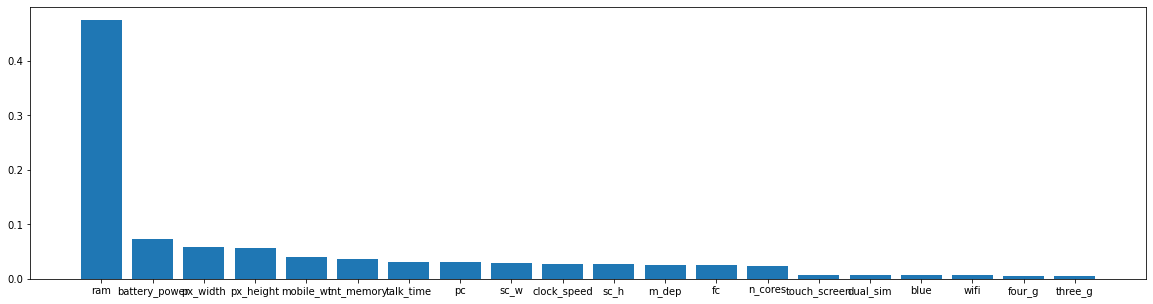

,importance
ram,0.475060
battery_power,0.073919
px_width,0.058286
px_height,0.055955
mobile_wt,0.040454
int_memory,0.036272
talk_time,0.031525
pc,0.030235
sc_w,0.029038
clock_speed,0.027785


In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model=RandomForestClassifier()
model.fit(x,y)

feature_score=pd.DataFrame(model.feature_importances_,index=x.columns,columns=['importance'])
feature_score=feature_score.sort_values(by='importance',ascending=False)

plt.figure(figsize=(20, 5))
plt.bar(feature_score.index,feature_score['importance'])
plt.show()
feature_score.head(n=10)


In [9]:
corr=df.corr()

In [10]:
print(corr)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

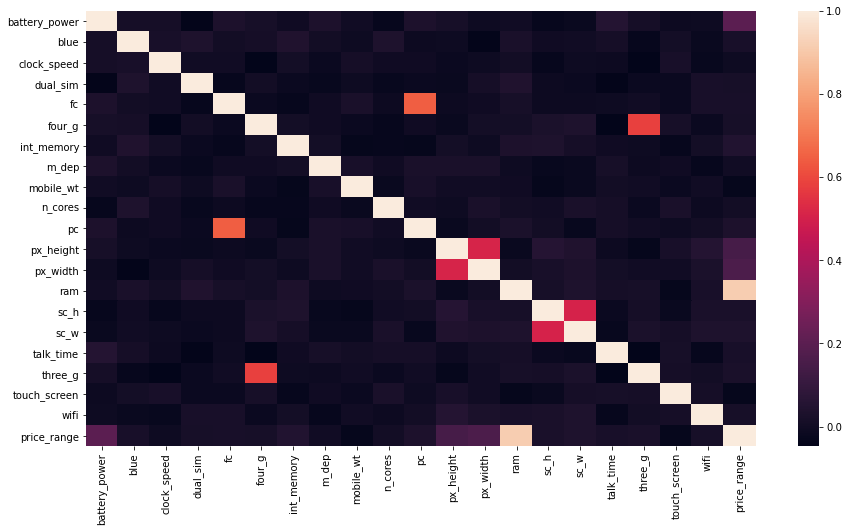

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(corr)
plt.show()